In [8]:
###################  6. Was ist ein Packet?
## Beispiel-Packet agricolae
library(agricolae)
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(magrittr))

In [10]:
###################  7. Die Daten einlesen/importieren (read.table(); read.csv() etc.)
getwd()
## reading the data
df <- read.table("Daten_Radieschen_2004.csv",sep=";",dec=".",h=T)
klima <- read.csv("Klima.csv",sep=";",dec=".",h=T)

[1] "/Users/tien"

In [14]:
################### 8. Die Struktur der Daten pr?fen (int, num, chr, Factor, Date.) und ?ndern
## Namen der Spalte
str(df)
## The first rows of the data
head(df)

'data.frame':	36 obs. of  5 variables:
 $ Datum       : Factor w/ 3 levels "2004-11-11","2004-11-25",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Variante    : int  100 100 100 100 75 75 75 75 50 50 ...
 $ Wiederholung: int  1 2 3 4 1 2 3 4 1 2 ...
 $ TGKnolle    : num  0.01 0.02 0.03 0.05 0.04 0.04 0.03 NA 0.05 0.01 ...
 $ TGBlatt     : num  0.2 0.26 0.25 0.24 0.21 0.24 0.27 0.2 0.21 0.23 ...


,Datum,Variante,Wiederholung,TGKnolle,TGBlatt
,<fct>,<int>,<int>,<dbl>,<dbl>
1,2004-11-11,100,1,0.01,0.20
2,2004-11-11,100,2,0.02,0.26
3,2004-11-11,100,3,0.03,0.25
4,2004-11-11,100,4,0.05,0.24
5,2004-11-11,75,1,0.04,0.21
6,2004-11-11,75,2,0.04,0.24


In [15]:
## example: as.Date, the part "%Y-%m-%d" is adapted by the form of the data
df$Datum <- as.Date(df$Datum, "%Y-%m-%d")
df$Variante <- as.factor(paste("W", df$Variante, sep=""))
str(df)

'data.frame':	36 obs. of  5 variables:
 $ Datum       : Date, format: "2004-11-11" "2004-11-11" ...
 $ Variante    : Factor w/ 3 levels "W100","W50","W75": 1 1 1 1 3 3 3 3 2 2 ...
 $ Wiederholung: int  1 2 3 4 1 2 3 4 1 2 ...
 $ TGKnolle    : num  0.01 0.02 0.03 0.05 0.04 0.04 0.03 NA 0.05 0.01 ...
 $ TGBlatt     : num  0.2 0.26 0.25 0.24 0.21 0.24 0.27 0.2 0.21 0.23 ...


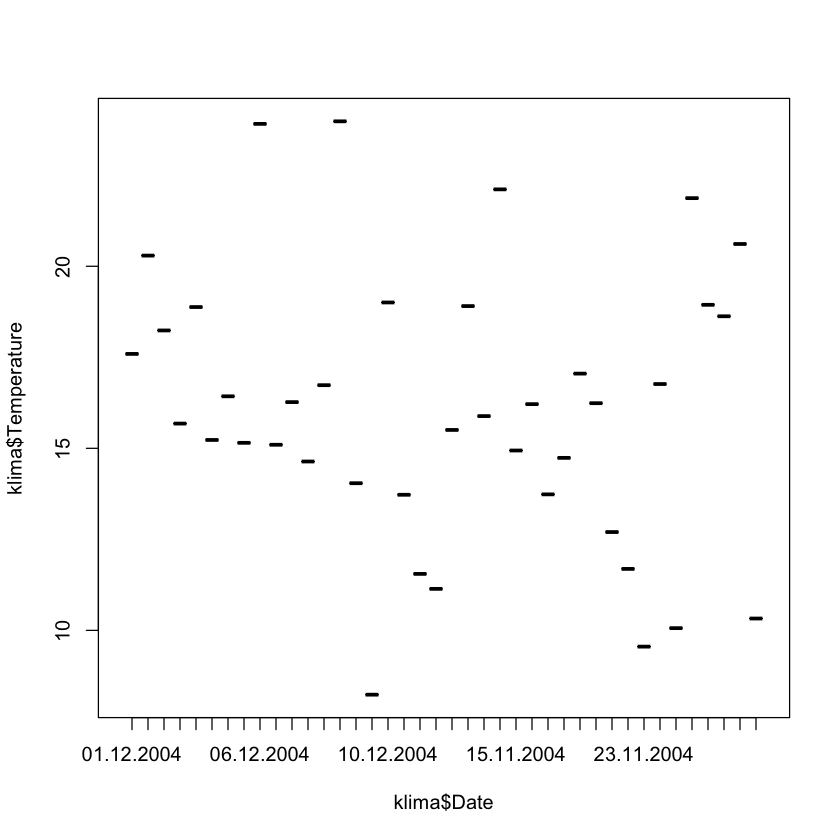

In [16]:

## Berechung der Thermalzeit und Temperatursumme

### 1. Lineares Modell mit Basistemperatur
## Basistemperatur
Tbase <- 3.5
## Berechnung der Thermalzeit ?Cd

## Berechnung der Temperatursumme


###################  11. Wie mache ich eine Abbildung in R?
## Klimadaten plotten
plot(klima$Temperature~klima$Date)

# Graphische Parameter in R
- ## [statmethods](https://www.statmethods.net/advgraphs/parameters.html)
- ## [R cheat sheet](https://rstudio.com/resources/cheatsheets/)

## googeln : **#r plot cheatsheet**, **#Bilder**

[1] 8.233941

[1] 23.98062

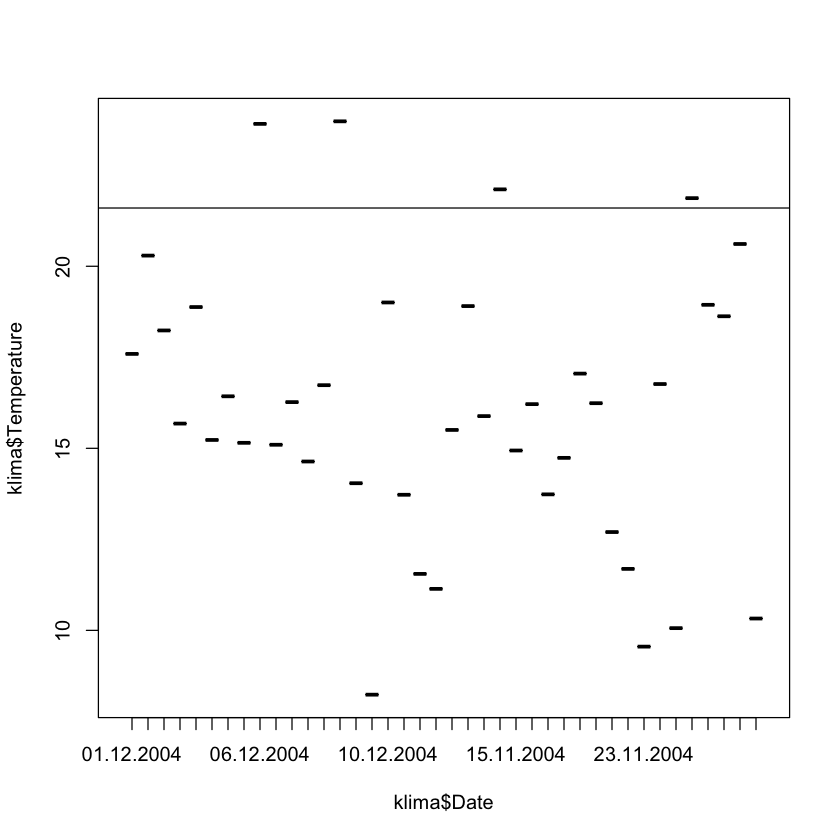

In [19]:
### Plot
plot(klima$Temperature~klima$Date)
min(klima$Temperature)
max(klima$Temperature)


### Linie
abline(Topt, 0)
abline(Tmax, 0, col="red")
abline(Tbase, 0, col="red")

In [20]:
### 2. Knickpunkt-Modell f?r die Berechung der Thermalzeit und Temperatursumme
Tbase <- 3.5
Topt <- 21.6
Tmax <- 32.1

klima$Thermalzeit2 <- ifelse(klima$Temperature<Topt, ## if
                             Topt*(klima$Temperature-Tbase)/(Topt-Tbase),            ## yes
                             Topt*(Tmax-klima$Temperature)/(Tmax-Topt)              ## no
                             )
klima$TS2 <- cumsum(klima$Thermalzeit2)



plot(Thermalzeit2~Thermalzeit1, data=klima)
## 1 to 1 line
abline(0,1)

ERROR: Error in eval(predvars, data, env): 找不到物件 'Thermalzeit1'


ERROR: Error in (function (formula, data = NULL, subset = NULL, na.action = na.fail, : invalid type (NULL) for variable 'klima$Thermalzeit1'


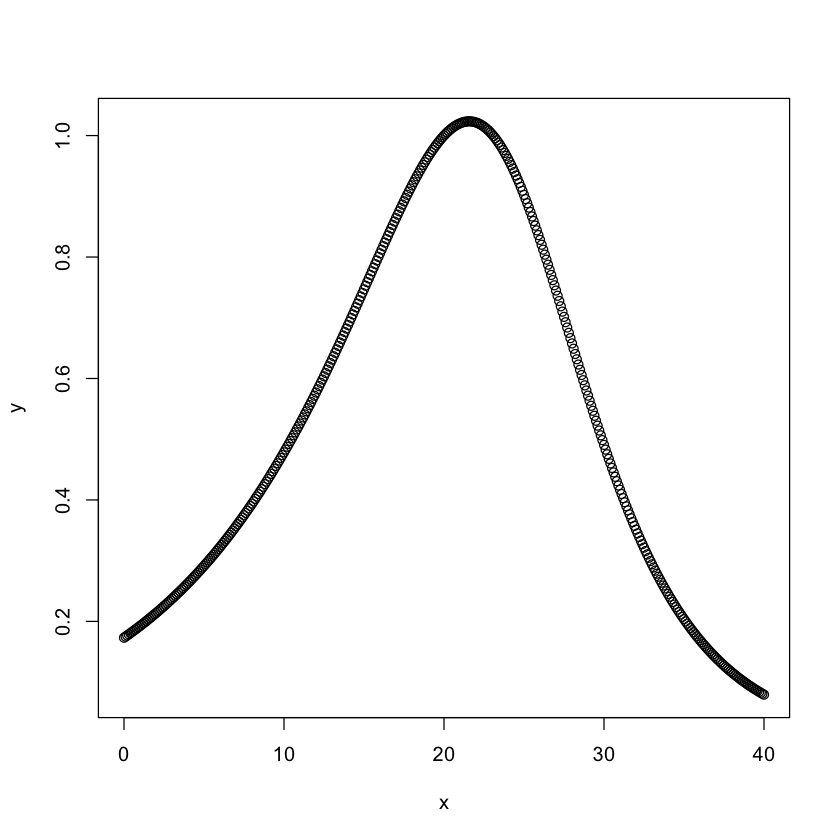

In [21]:
### 3. Arrhenius-type response curves (Ansprechkurve) f?r die Berechung der Thermalzeit und Temperatursumme
## Parameter for effective Temperature sum (Parent et al., 2012, Cauliflower)
deltaH=63600
A=937088859.183916
alpha = 3.5
R = 8.314
K = 273
T0=297.4

## Die Kurve checken
x <- seq(0, 40, by=0.1)
y <-A*(x+K)*exp(-deltaH/(R*(x+K)))/(1+exp(-deltaH/(R*(x+K)))^(alpha*(1-(x+K)/T0)))
plot(y~x)

klima$Thermalzeit3 <- A*(klima$Temperature+K)*exp(-deltaH/(R*(klima$Temperature+K)))/(1+exp(-deltaH/(R*(klima$Temperature+K)))^(alpha*(1-(klima$Temperature+K)/T0)))
klima$TS3 <- cumsum(klima$Thermalzeit3)
## Checken
plot(klima$Thermalzeit3~klima$Thermalzeit1)


## Vorsicht mit ? berschreiben!

# Hilfe!! Hilfe!!

# Googeln
- ## ? in Console
- ## ?? in Console

In [23]:
df[1, 1]

## using "subset" to select the part of the data 
test <- subset(df, DAT>20)
## quick select
##Create test with the 3rd, 5th columns of df 



## ANOVA

y=a*exp(b*x)
df$DAT <- as.numeric(df$DAT)
test <- nls(TGGesamt~a*exp(b*DAT), data=df, start = list(a = 0.5, b = 0.2))
abline(test)

fit <- aov(lm(TGGesamt~Variante, data=subset(df, DAT>25)))
fit
summary(fit)

## Visualization
library(agricolae)
##Multiple comparisons: Tukey
out <- HSD.test(fit, "Variante", group=TRUE)
plot(out, main="Wachstumsrate")
plot(out, main="Wachstumsrate", ylim=c(0,3))

[1] "2004-11-11"

ERROR: Error in eval(e, x, parent.frame()): 找不到物件 'DAT'


In [24]:
out2 <- LSD.test(fit, "Variante",console=TRUE)
plot(out2)

#df$DAT <- as.factor(df$DAT)
#fit2 <- aov(TGGesamt~Variante+DAT+Variante:DAT, data=df)
#summary(fit2)


## The structure of the data
## using "split" to structure the data in small sets
#x <-split(df, df$Datum, drop=TRUE)[[1]]
#x <-split(df, list(df$Variante, df$Wiederholung), drop=TRUE)[[1]]


### Vergleich Wachstumsrate 
XXXXX = do.call('rbind',lapply(split(df, df$Variante, drop=TRUE), function(x) {
  # x <- split(df, df$Variante, drop=TRUE)[[1]]    ### Testing if thins works
  x
}))


## Wachstumsrate berechnen:
library(zoo)
x$dDate <- rollapply(x$Datum,  width = 2, FUN = diff.Date, fill=NA, align='right')
## difference in whole dry mass
x$dGesamt <- rollapply(x$TGGesamt,  width = 2, FUN = diff, fill=NA, align='right')
## difference in leaf dry mass
x$dBlatt <- rollapply(x$TGBlatt,  width = 2, FUN = diff, fill=NA, align='right')
## difference in bulb dry mass
x$dKnolle <- rollapply(x$TGKnolle,  width = 2, FUN = diff, fill=NA, align='right')
## whole plant growth rate
x$Gesamt_Rate <- x$dGesamt/x$dDate
x$Blatt_Rate <- x$dBlatt/x$dDate
x$Knolle_Rate <- x$dKnolle/x$dDate
x

## do.call

XXXXX = do.call('rbind',lapply(split(df, list(df$Variante, df$Wiederholung), drop=TRUE), function(x) {
  # x <- split(df, list(df$Variante, df$Wiederholung))[[1]]    ### Testing if thins works
   x
}))

###################  Ergebnisse in .csv Format speichern

set.seed(218123)
## Generate 6 values from 1 to 200 
for (i in 1:4){
  test <- data.frame(n =sample(1:6,6, replace=F))## replace = T means the value can be repeated
  x <- data.frame(Behandlung=c("NaCl_S0","NaCl_S1","NaCL_S2", "NaCl_S0","NaCl_S1","NaCL_S2"))
  ran <- cbind(test,x)
  ran <- ran[order(ran$n),]
  print(ran$Behandlung)
}


ERROR: Error in "aov" %in% class(y): 找不到物件 'fit'
